In [9]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('./data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(f"n_categories={n_categories}")
print(f"all_categories={all_categories}")
print(f"category_lines={category_lines}")
print(f"all_letters={all_letters}") #26*2+5=52+5=57

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
Slusarski
n_categories=18
all_categories=['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
category_lines={'Arabic': ['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Baha

In [7]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print("J:",letterToTensor('J'))
print("j:",letterToTensor('j'))

print(lineToTensor('Jones').size())#5*1*57
print("Jones:",lineToTensor('Jones'))

J: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
j: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])
Jones: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [38]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor
print(randomTrainingExample())

('Arabic', 'Sayegh', tensor([0]), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [39]:
total=0
for ntype in all_categories:
    NameList=category_lines[ntype]
    total+=len(NameList)
print(f"total data={total}")

total data=20074


In [41]:
import torch
import torch.nn as nn

class CustomRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomRNNCell, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_cell = nn.RNNCell(input_size, hidden_size)#h’ of shape (batch, hidden_size): tensor containing the next hidden state for each element in the batch
        self.linear = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)#apply the logsoftmat for column

    def forward(self, input_seq):
        # Initialize hidden state
        batch_size = input_seq.size(1)#be careful, the data size=(seq_len,batch_size,feature_len)
        hidden_state = torch.zeros(batch_size, self.hidden_size) # here, or not?

        # Loop through input tokens
        for i in range(input_seq.size(0)):#be careful, the data size=(seq_len,batch_size,feature_len)
            hidden_state = self.rnn_cell(input_seq[i, :, :], hidden_state)

        output = self.linear(hidden_state)
        output = self.softmax(output)
        return output

# model parameter
input_size = n_letters  # each character len, feature len
hidden_size = 128  # the same as the tutorial
output_size = n_categories  # 

# creat the model
rnn_model = CustomRNNCell(input_size, hidden_size, output_size)

#train the model
# training data: input_data 
# #labels: target_labels
# 设置优化器和损失函数
learning_rate = 0.001
criterion = nn.NLLLoss()  # 使用负对数似然损失作为损失函数
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=learning_rate)

# 迭代训练模型
epochs = 5
trainingN=int(total*0.8)
testN=int(total*0.2)
train_loss=[]
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(trainingN):
        category, line, category_tensor, line_tensor=randomTrainingExample()
        optimizer.zero_grad()  # 梯度归零
        output = rnn_model(line_tensor)  # 前向传播
        #print(f"output={output}")
        #print(f"target={target}")
        loss = criterion(output, category_tensor)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
    running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/total}")
    train_loss.append(running_loss/total)
print('Training finished!')
# Save the trained model
torch.save(rnn_model.state_dict(), 'rnn_model.pth')


Epoch 1/5, Loss: 1.1854989423901005e-05
Epoch 2/5, Loss: 2.925332661250845e-05
Epoch 3/5, Loss: 1.5589790588547844e-06
Epoch 4/5, Loss: 2.3224667647011527e-07
Epoch 5/5, Loss: 5.88794546831862e-06
Training finished!


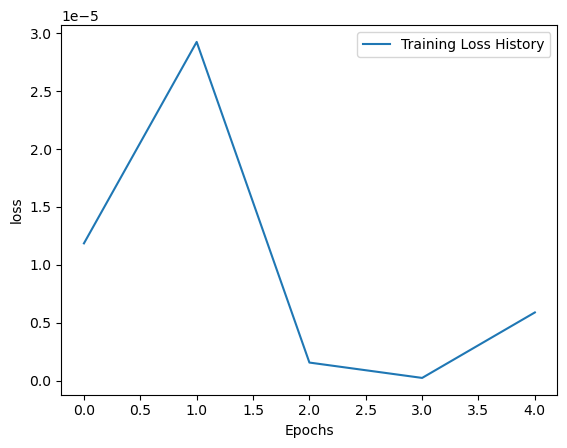

In [42]:
import matplotlib.pyplot as plt
def plotLossHistory(train_losses):
    plt.figure()
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
plotLossHistory(train_loss)

In [47]:
# Load the trained autoencoder model
rnn_model.load_state_dict(torch.load('rnn_model.pth'))
rnn_model.eval()
# Reconstruct and display the chosen examples
accuracy=0.0
correct=0
predictions=[]
trueLabel=[]
with torch.no_grad():
    for i in range(testN):
        category, line, category_tensor, line_tensor=randomTrainingExample()
        print(f"category_tensor.item()={category_tensor.item()}")
        output = rnn_model(line_tensor)  # 前向传播
        trueLabel.append(category_tensor.item())
        _, predicted = torch.max(output, 1)  # 获取预测结果的索引
        predictions.append(predicted.item())  # 将预测结果加入到预测列表中
        print("predicted.item()=",predicted.item())
        if predicted==category_tensor.item():
            correct+=1
    print(f"accuracy={correct/testN}")
            

category_tensor.item()=0
predicted.item()= 0
category_tensor.item()=9
predicted.item()= 9
category_tensor.item()=6
predicted.item()= 6
category_tensor.item()=11
predicted.item()= 11
category_tensor.item()=14
predicted.item()= 2
category_tensor.item()=4
predicted.item()= 0
category_tensor.item()=5
predicted.item()= 5
category_tensor.item()=2
predicted.item()= 2
category_tensor.item()=13
predicted.item()= 13
category_tensor.item()=2
predicted.item()= 2
category_tensor.item()=7
predicted.item()= 7
category_tensor.item()=12
predicted.item()= 12
category_tensor.item()=6
predicted.item()= 6
category_tensor.item()=13
predicted.item()= 13
category_tensor.item()=1
predicted.item()= 1
category_tensor.item()=17
predicted.item()= 17
category_tensor.item()=2
predicted.item()= 3
category_tensor.item()=1
predicted.item()= 1
category_tensor.item()=1
predicted.item()= 1
category_tensor.item()=12
predicted.item()= 12
category_tensor.item()=1
predicted.item()= 1
category_tensor.item()=5
predicted.item()=

Confusion Matrix:
[[200   0   3  10   0   0   2   0   3   0   3   0   0   0   0   0   0   0]
 [  0 203   2   1   2   1   0   0   0   0   0  15   0   0   0   2   0   9]
 [  2   4 116  19  13   5   8   2   4   5   4   0   3   2  15   7  11   0]
 [  0   0   6 189   1   2   7   2   0   0   0   0   1   0   3   2   2   0]
 [  9   2   9  41  67  17  22   6  11   1   1   0   1   3   5  29   2   1]
 [  0   0   3   9  29 148   6   7   6   0   0   1   0   4   1   3   8   0]
 [  3   3  11  57  24  14  65   0   1   0   0   2   0   1   1   8   5   1]
 [  4   0   0   5   1   0   0 176   0   4   8   0   0   0   0   6  12   0]
 [  1   1   9   2  13   5   4   1 171   0   0   0   0   3   4   6   2   0]
 [  4   0   5   3   2   8   0   3   1 136   5   0   0   7   2   1  41   0]
 [  5   2   0   1   2   0   0   0   5   7 198   0   6   0   0   0   4   0]
 [  0  29   0   2   0   0   0   0   0   0   0 180   0   0   0   0   0  13]
 [  0   1  30  10   3   1   2   0   0   1   5   0 142   1   0   4   4   0]
 [  0  

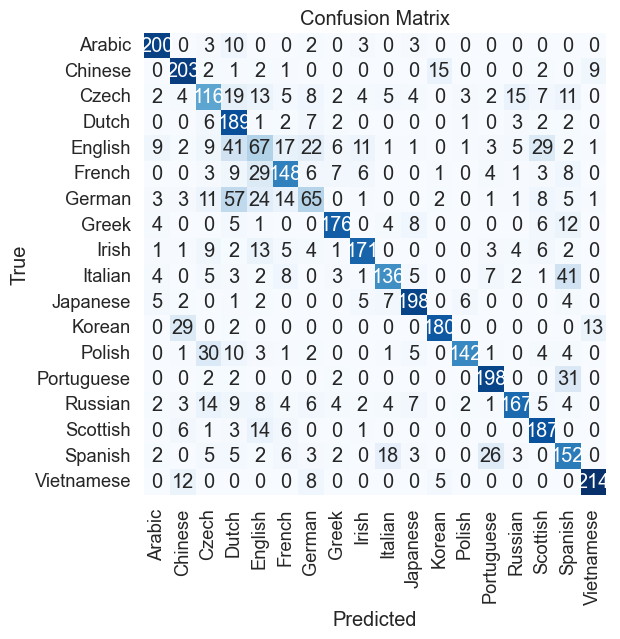

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix2(true_labels, predicted_labels, class_names=['Class 0', 'Class 1', 'Class 2']):
    # 计算混淆矩阵
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # 创建热图
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # 设置字体大小
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    #plt.show()
confusion = confusion_matrix(trueLabel, predictions)
print("Confusion Matrix:")
print(confusion)
plot_confusion_matrix2(trueLabel,predictions,class_names=all_categories)


使用 LSTM（长短期记忆网络）相比基本的 RNN 在训练网络达到准确性方面通常会有一些优势。以下是几个关键因素：

长期依赖性处理： LSTM 设计用来解决 RNN 存在的梯度消失和梯度爆炸的问题。它通过门控机制（输入门、遗忘门和输出门）来控制信息的流动，能够更有效地处理长期依赖性，使其能够更好地捕捉和记忆长期序列中的模式和信息。这对于许多任务（如自然语言处理中的语义理解和时间序列预测）来说是非常有用的。

避免梯度消失： LSTM 中的门控机制可以有选择性地保留或遗忘信息，这有助于避免 RNN 中常见的梯度消失问题。因此，LSTM 对于在训练长序列时更容易捕捉到远距离的依赖关系。

网络训练稳定性： LSTM 的门控结构有助于网络的稳定性，减少了梯度异常和不稳定的情况，因此相比基本的 RNN，在训练过程中更不容易出现训练中断或梯度爆炸等问题。

尽管 LSTM 有这些优点，但并非在所有情况下都比基本的 RNN 更好。有时在计算资源有限或者序列较短的情况下，基本的 RNN 可能会更加轻量级且拥有更快的训练速度。因此，对于特定的任务，可能需要根据实际情况和数据的特性来选择合适的模型。

综上所述，LSTM 在许多情况下能够提高训练网络达到的准确性，特别是在需要处理长序列、长期依赖性和稳定训练等方面。